# Extract the data

We use openShimmerFile function to extract the raw gsr data from the shimmer file like below:

In [0]:
Raw_GSR = openShimmerFile('110_Session1_Shimmer_9301_Calibrated_PC.csv', 'Shimmer_9301_GSR_Skin_Conductance_CAL')

# Visualizing the raw data
First we are going to visualize the data: (This is the raw gsr data collected from Shimmer GSR+ with duration of around 30 minutes.)

The freuqency rate of the device is set to 128Hz.

<Figure size 864x288 with 0 Axes>

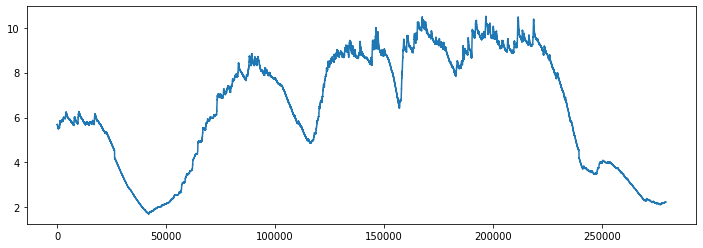

<Figure size 864x288 with 0 Axes>

In [26]:
# Visualise the data
gsrdata = np.array(Raw_GSR)
plt.figure(figsize=(12,4))
plt.plot(gsrdata)
plt.figure(figsize=(12,4))

# Resampling the rate
128Hz frequency rate means 128 samples per seconds which makes it hard for analysis, as a result, we downsample the signal using resample_data function to 40Hz means 40 samples per seconds.

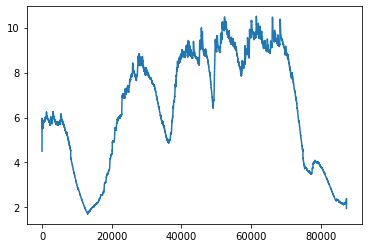

In [28]:
sample_rate=40
data = resample_data(gsrdata, 128, sample_rate)
plt.plot(data)

# Low pass filter
After downsampling, we pass the signal from low pass filter with cutoff equals to 5/sample_rate using butter_lowpassfilter function to remove the noise from it specially artifact noise because of the movement of the device.

As you can see in the below plot, the signal is much smoother with less noise. If you need smoother signal or you have more noise in your original EDA, you can increase the order to 6 or 8.

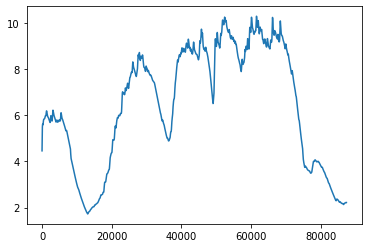

In [31]:
filtered_gsr = butter_lowpassfilter(data, 5/sample_rate, sample_rate, order=2)
plt.plot(filtered_gsr)

# Rolling Window
After filtering we pass the rolling window with size 0.75*sample_rate from the filtered GSR to have a smoother signal. 

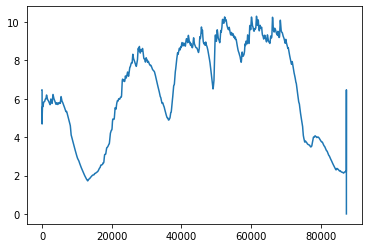

In [32]:
rol_mean = rolling_mean(filtered_gsr, 0.75, sample_rate)
plt.plot(rol_mean)

# Normalization
After window averaging we normalize the data using normalization function which uses min-max normalization technique.

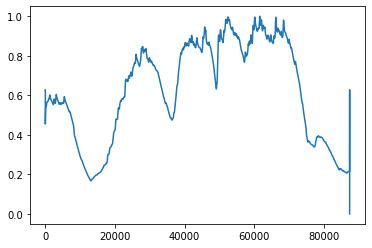

In [34]:
normalized_gsr = normalization(rol_mean)
plt.plot(normalized_gsr)